# Matching Pursuit revised

This notebook experiments with the new features of the OMP solver (when used in MP mode) to be included in PyLops 2.5.0

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from pylops.basicoperators import *
from pylops.optimization.sparsity import omp

## Basic problem

Columns norms: [1.24374865 0.80082029 1.01804444 1.11361889 0.90912607 1.07423844
 1.25021687 1.25314481 0.90574298 1.024523   1.02046568 0.86083591
 1.203404   1.12309284 1.06126916 0.98604477 1.00636599 1.0449682
 1.00933021 1.0163591 ]
self.norms = array([1.24374865, 0.80082029, 1.01804444, 1.11361889, 0.90912607,
       1.07423844, 1.25021687, 1.25314481, 0.90574298, 1.024523  ,
       1.02046568, 0.86083591, 1.203404  , 1.12309284, 1.06126916,
       0.98604477, 1.00636599, 1.0449682 , 1.00933021, 1.0163591 ])


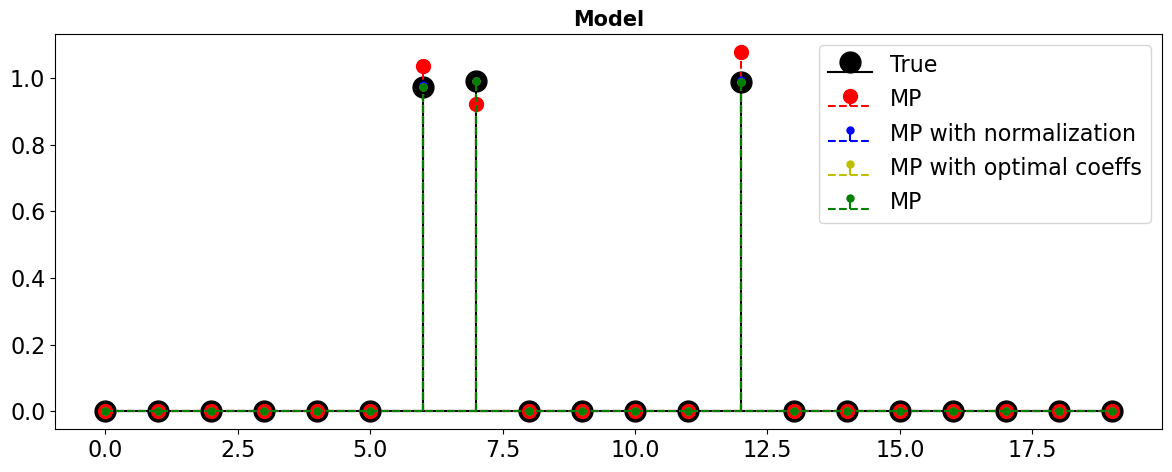

In [2]:
np.random.seed(0)

# Problem setting
N, M = 15, 20
A = np.random.randn(N, M)
A = A / np.linalg.norm(A, axis=0)
Anorm = (1. + np.random.normal(0, 0.15, M))
A = A / Anorm[None] # Create mild disparity in columns norm
Aop = MatrixMult(A)
print('Columns norms:', 1. / Anorm)

x = np.random.rand(M)
x[x < 0.9] = 0
y = Aop * x

# MP/OMP
maxit = 10
x_mp, _, cost_mp = omp(Aop, y, niter_outer=maxit, niter_inner=0, sigma=1e-4)
x_mpnorm, _, cost_mpnorm = omp(Aop, y, niter_outer=maxit, niter_inner=0, normalizecols=True, sigma=1e-4)
x_mpopt, _, cost_mpopt = omp(Aop, y, niter_outer=maxit, niter_inner=0, optimal_coeff=True, sigma=1e-4)
x_omp, _, cost_omp = omp(Aop, y, niter_outer=maxit, sigma=1e-4)

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
m, s, b = ax.stem(x, linefmt="k", basefmt="k", markerfmt="ko", label="True")
plt.setp(m, markersize=15)
m, s, b = ax.stem(x_mp, linefmt="--r", basefmt="--r", markerfmt="ro", label="MP")
plt.setp(m, markersize=10)
m, s, b = ax.stem(x_mpnorm, linefmt="--b", basefmt="--b", markerfmt="bo", label="MP with normalization")
plt.setp(m, markersize=5)
m, s, b = ax.stem(x_mpopt, linefmt="--y", basefmt="--y", markerfmt="yo", label="MP with optimal coeffs")
plt.setp(m, markersize=5)
m, s, b = ax.stem(x_omp, linefmt="--g", basefmt="--g", markerfmt="go", label="MP")
plt.setp(m, markersize=5)
ax.set_title("Model", size=15, fontweight="bold")
ax.legend()
plt.tight_layout()

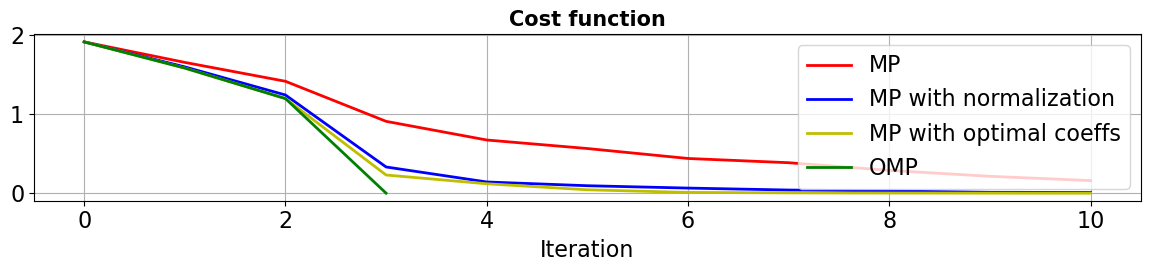

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(cost_mp, "r", lw=2, label="MP")
ax.plot(cost_mpnorm, "b", lw=2, label="MP with normalization")
ax.plot(cost_mpopt, "y", lw=2, label="MP with optimal coeffs")
ax.plot(cost_omp, "g", lw=2, label="OMP")
ax.set_title("Cost function", size=15, fontweight="bold")
ax.set_xlabel("Iteration")
ax.legend()
ax.grid(True, which="both")
plt.tight_layout()

## Problem with basis function plus another operator

Columns norms: [1.24374865 0.80082029 1.01804444 1.11361889 0.90912607 1.07423844
 1.25021687 1.25314481 0.90574298 1.024523   1.02046568 0.86083591
 1.203404   1.12309284 1.06126916 0.98604477 1.00636599 1.0449682
 1.00933021 1.0163591 ]
self.norms = array([1.47165746, 0.94765846, 1.32197337, 1.038891  , 0.84131705,
       1.10161368, 1.25477614, 1.33408557, 0.9036667 , 1.27007006,
       0.88688789, 0.75236528, 1.04170336, 1.32501727, 1.17300321,
       1.2856758 , 0.87729564, 0.85352517, 1.31917057, 0.81274975])
self.norms = array([1.24374865, 0.80082029, 1.01804444, 1.11361889, 0.90912607,
       1.07423844, 1.25021687, 1.25314481, 0.90574298, 1.024523  ,
       1.02046568, 0.86083591, 1.203404  , 1.12309284, 1.06126916,
       0.98604477, 1.00636599, 1.0449682 , 1.00933021, 1.0163591 ])


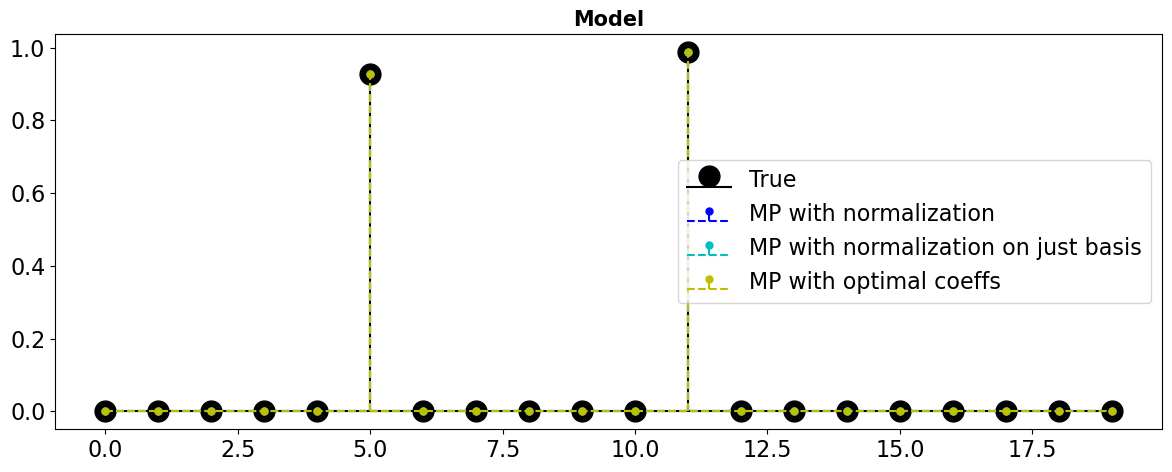

In [33]:
np.random.seed(0)

# Problem setting
N, M = 15, 20
A = np.random.randn(N, M)
A = A / np.linalg.norm(A, axis=0)
Anorm = (1. + np.random.normal(0, 0.15, M))
A = A / Anorm[None] # Create mild disparity in columns norm
B = np.random.randn(N, N)
B = B / np.linalg.norm(B, axis=0)
Bnorm = np.ones(N) # + 0 * np.random.rand(N)
Bbefore = B.copy()
B = B / Bnorm[None] # Create mild disparity in columns norm
Aop = MatrixMult(A)
Bop = MatrixMult(B)
Op = Bop @ Aop
print('Columns norms:', 1. / Anorm)

x = np.random.rand(M)
x[x < 0.9] = 0
y = Op * x

# MP/OMP
maxit = 30
x_mpnorm, _, cost_mpnorm = omp(Op, y, niter_outer=maxit, niter_inner=0, normalizecols=True, sigma=0)
x_mpnorm1, _, cost_mpnorm1 = omp(Op, y, niter_outer=maxit, niter_inner=0, normalizecols=True, Opbasis=Aop, sigma=0)
x_mpopt, _, cost_mpopt = omp(Op, y, niter_outer=maxit, niter_inner=0, optimal_coeff=True, sigma=0)

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
m, s, b = ax.stem(x, linefmt="k", basefmt="k", markerfmt="ko", label="True")
plt.setp(m, markersize=15)
m, s, b = ax.stem(x_mpnorm, linefmt="--b", basefmt="--b", markerfmt="bo", label="MP with normalization")
plt.setp(m, markersize=5)
m, s, b = ax.stem(x_mpnorm1, linefmt="--c", basefmt="--c", markerfmt="co", label="MP with normalization on just basis")
plt.setp(m, markersize=5)
m, s, b = ax.stem(x_mpopt, linefmt="--y", basefmt="--y", markerfmt="yo", label="MP with optimal coeffs")
plt.setp(m, markersize=5)
ax.set_title("Model", size=15, fontweight="bold")
ax.legend()
plt.tight_layout()

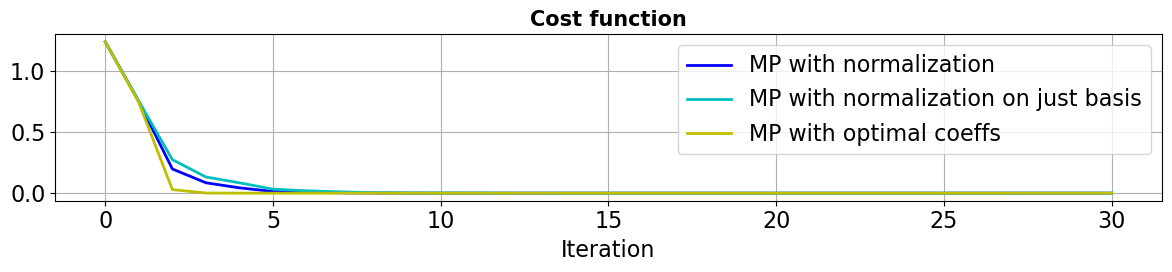

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.plot(cost_mpnorm, "b", lw=2, label="MP with normalization")
ax.plot(cost_mpnorm1, "c", lw=2, label="MP with normalization on just basis")
ax.plot(cost_mpopt, "y", lw=2, label="MP with optimal coeffs")
ax.set_title("Cost function", size=15, fontweight="bold")
ax.set_xlabel("Iteration")
ax.legend()
ax.grid(True, which="both")
plt.tight_layout()